In [1]:
!pip install numpy
!pip install pandas
!pip install scipy
!pip install scikit-learn
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 4.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 4.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 3.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 3.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 4.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip

In [35]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff 

raw_data = loadarff('res/dataset.arff')
df = pd.DataFrame(raw_data[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [36]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=5)

In [38]:
X_ = df.drop(['class'], axis=1)
X = pd.get_dummies(X_)

y = pd.factorize(df['class'])[0]
X

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_b'0<=X<200',checking_status_b'<0',checking_status_b'>=200',...,housing_b'own',housing_b'rent',job_b'high qualif/self emp/mgmt',job_b'skilled',job_b'unemp/unskilled non res',job_b'unskilled resident',own_telephone_b'none',own_telephone_b'yes',foreign_worker_b'no',foreign_worker_b'yes'
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,False,True,False,...,True,False,False,True,False,False,False,True,False,True
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,True,False,False,...,True,False,False,True,False,False,True,False,False,True
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,False,False,False,...,True,False,False,False,False,True,True,False,False,True
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,False,True,False,...,False,False,False,True,False,False,True,False,False,True
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,False,True,False,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.0,1736.0,3.0,4.0,31.0,1.0,1.0,False,False,False,...,True,False,False,False,False,True,True,False,False,True
996,30.0,3857.0,4.0,4.0,40.0,1.0,1.0,False,True,False,...,True,False,True,False,False,False,False,True,False,True
997,12.0,804.0,4.0,4.0,38.0,1.0,1.0,False,False,False,...,True,False,False,True,False,False,True,False,False,True
998,45.0,1845.0,4.0,4.0,23.0,1.0,1.0,False,True,False,...,False,False,False,True,False,False,False,True,False,True


In [39]:
list(X.columns)

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents',
 "checking_status_b'0<=X<200'",
 "checking_status_b'<0'",
 "checking_status_b'>=200'",
 "checking_status_b'no checking'",
 "credit_history_b'all paid'",
 "credit_history_b'critical/other existing credit'",
 "credit_history_b'delayed previously'",
 "credit_history_b'existing paid'",
 "credit_history_b'no credits/all paid'",
 "purpose_b'business'",
 "purpose_b'domestic appliance'",
 "purpose_b'education'",
 "purpose_b'furniture/equipment'",
 "purpose_b'new car'",
 "purpose_b'other'",
 "purpose_b'radio/tv'",
 "purpose_b'repairs'",
 "purpose_b'retraining'",
 "purpose_b'used car'",
 "savings_status_b'100<=X<500'",
 "savings_status_b'500<=X<1000'",
 "savings_status_b'<100'",
 "savings_status_b'>=1000'",
 "savings_status_b'no known savings'",
 "employment_b'1<=X<4'",
 "employment_b'4<=X<7'",
 "employment_b'<1'",
 "employment_b'>=7'",
 "employment_b'unemployed'",
 "pers

In [40]:
clf.fit(X, y)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [41]:
from sklearn.metrics import accuracy_score

accuracy_score(y, clf.predict(X))

0.785

In [42]:
feature_importance = list(zip(clf.feature_names_in_, clf.feature_importances_))
feature_importance_sorted = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance_sorted

[("checking_status_b'no checking'", 0.31970332459799783),
 ('duration', 0.1744947130153174),
 ('credit_amount', 0.12261269967051461),
 ("purpose_b'new car'", 0.06156458300921387),
 ("credit_history_b'all paid'", 0.04813557706225832),
 ("savings_status_b'<100'", 0.04786263651998783),
 ("purpose_b'radio/tv'", 0.036597180449479065),
 ("other_payment_plans_b'none'", 0.03630326847787061),
 ("credit_history_b'existing paid'", 0.03193638435947449),
 ('age', 0.02971412915357613),
 ('residence_since', 0.01591101010033948),
 ("other_parties_b'co applicant'", 0.013380411347701173),
 ("employment_b'unemployed'", 0.012828219019410898),
 ("job_b'skilled'", 0.011997399129680494),
 ('existing_credits', 0.011442214731543164),
 ("property_magnitude_b'no known property'", 0.010982541847771506),
 ("personal_status_b'male single'", 0.009762259420241339),
 ("credit_history_b'critical/other existing credit'", 0.004771448087621782),
 ('installment_commitment', 0.0),
 ('num_dependents', 0.0),
 ("checking_statu

In [43]:
feature_importance_sorted_vals = [f for f, _ in feature_importance_sorted]
feature_importance_sorted_vals[:15]

["checking_status_b'no checking'",
 'duration',
 'credit_amount',
 "purpose_b'new car'",
 "credit_history_b'all paid'",
 "savings_status_b'<100'",
 "purpose_b'radio/tv'",
 "other_payment_plans_b'none'",
 "credit_history_b'existing paid'",
 'age',
 'residence_since',
 "other_parties_b'co applicant'",
 "employment_b'unemployed'",
 "job_b'skilled'",
 'existing_credits']

In [50]:
X_ = df.drop(['class'], axis=1)
X__ = pd.get_dummies(X_)
X = X__[feature_importance_sorted_vals[:10]]

y = pd.factorize(df['class'])[0]
X

,checking_status_b'no checking',duration,credit_amount,purpose_b'new car',credit_history_b'all paid',savings_status_b'<100',purpose_b'radio/tv',other_payment_plans_b'none',credit_history_b'existing paid',age
0,False,6.0,1169.0,False,False,False,True,True,False,67.0
1,False,48.0,5951.0,False,False,True,True,True,True,22.0
2,True,12.0,2096.0,False,False,True,False,True,False,49.0
3,False,42.0,7882.0,False,False,True,False,True,True,45.0
4,False,24.0,4870.0,True,False,True,False,True,False,53.0
...,...,...,...,...,...,...,...,...,...,...
995,True,12.0,1736.0,False,False,True,False,True,True,31.0
996,False,30.0,3857.0,False,False,True,False,True,True,40.0
997,True,12.0,804.0,False,False,True,True,True,True,38.0
998,False,45.0,1845.0,False,False,True,True,True,True,23.0


In [53]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=0)
parameters = { 'max_depth':range(2, 30), 'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random']}
clf_GridSearchCV = GridSearchCV(clf, parameters)

In [54]:
clf_GridSearchCV.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 30),
                         'splitter': ['best', 'random']})

In [56]:
clf_GridSearchCV.best_params_

{'criterion': 'gini', 'max_depth': 7, 'splitter': 'random'}

In [57]:
clf = clf_GridSearchCV.best_estimator_

In [58]:
accuracy_score(y, clf.predict(X))

0.795

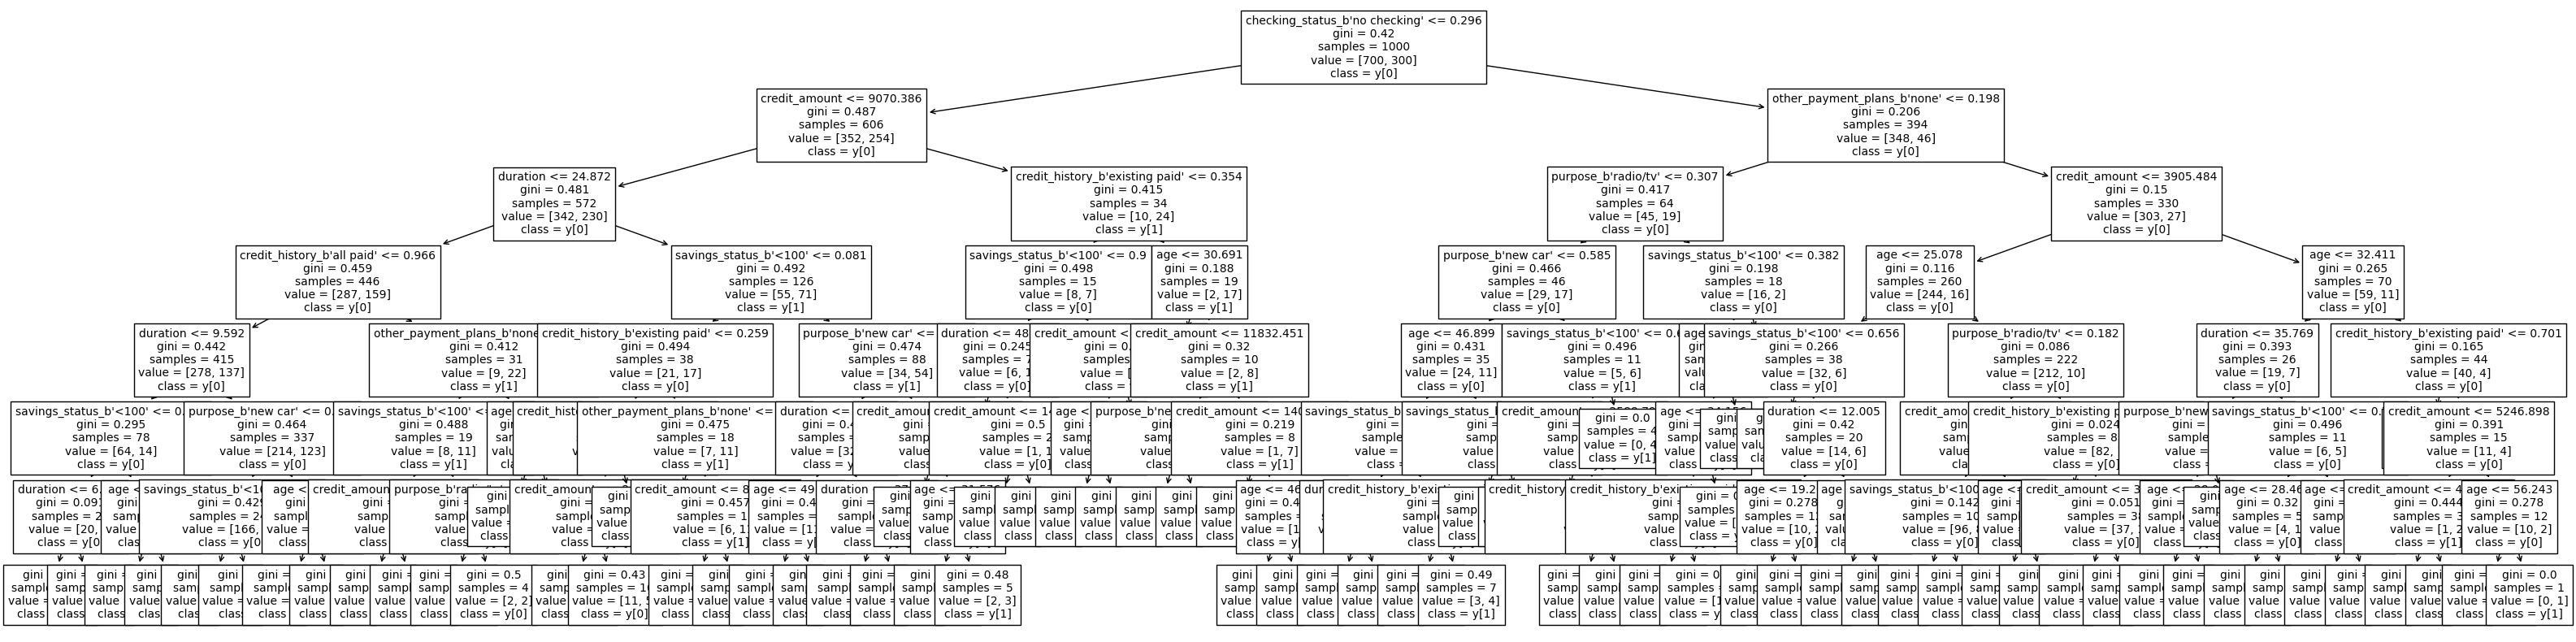

In [62]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(40,10))
tree.plot_tree(clf, feature_names=list(X.columns), class_names=True, fontsize=10)
plt.show()
